In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [2]:
banks = pd.read_csv("C:/Users/Ashwini/Downloads/bank-full.csv",delimiter = ";")
banks

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
banks.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
banks.shape

(45211, 17)

In [5]:
banks.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
X = banks.drop(['job','marital','education','default','housing','loan','contact','month','poutcome','y'], axis = 1)

In [7]:
banks['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
Y = banks['y'].map({"yes":1 ,"no":0})

In [9]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

# Model Building

In [10]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pre = classifier.predict(X)

In [12]:
classifier.predict_proba(X)[:,1]

array([0.07490443, 0.09767027, 0.13026546, ..., 0.22146912, 0.05564223,
       0.36011983])

In [13]:
y_pred = pd.DataFrame({'actual':Y,
                      'prob':classifier.predict_proba(X)[:,1],
                      'predicted_prob':classifier.predict(X)})

In [14]:
y_pred

,actual,prob,predicted_prob
0,0,0.074904,0
1,0,0.097670,0
2,0,0.130265,0
3,0,0.075604,0
4,0,0.179487,0
...,...,...,...
45206,1,0.301099,0
45207,1,0.038452,0
45208,1,0.221469,0
45209,0,0.055642,0


In [15]:
#confusion matrix for model accuracy
confusion_matrix = confusion_matrix(Y, y_pre)
confusion_matrix

array([[39274,   648],
       [ 4471,   818]], dtype=int64)

In [16]:
classifier.score(X,Y)

0.8867753422839575

<AxesSubplot:>

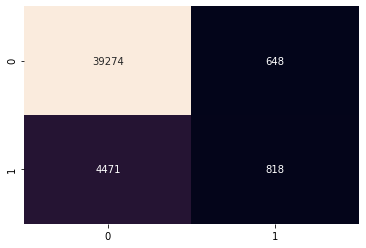

In [17]:
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cbar = False)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pre))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.15      0.24      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



# ROC Curve

In [19]:
auc = roc_auc_score(Y, y_pre)
auc

0.5692144823263748

Text(0, 0.5, 'True Positive Rate')

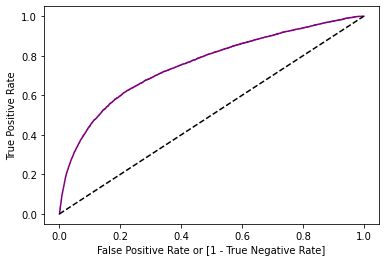

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr , thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

import matplotlib.pyplot as plt
auc = roc_auc_score(Y,classifier.predict(X))
plt.plot(fpr, tpr, color='purple', label='logit model ( area  = %0.3f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
# # plt.title('logit model (area = %0.2f)'%auc)